# KPIS NYC Taxis
## **Tratamiento de Datos para Power BI: Un Enfoque Integral**

Este cuaderno Jupyter está diseñado para proporcionar un proceso completo de tratamiento de diferentes conjuntos de datos, con el objetivo de facilitar su manejo en Power BI. Aquí encontrarás un análisis detallado y estructurado de los datos, incluyendo transformaciones, limpieza y preparación para su integración efectiva en el entorno de Power BI. Además, se presentarán secciones de código que demostrarán la generación y evaluación de KPIs antes de su implementación en el pDashboard de Power BI. Este enfoque profesional garantiza una implementación eficiente y optimizada de los datos dentro de la plataforma de análisis empresarial.

### **1. Importación de las Bibliotecas de Python**

Las bibliotecas utilizadas en este contexto desempeñan roles críticos en el proceso de análisis y modelado de datos. `Pandas` es esencial para la manipulación y estructuración eficiente de conjuntos de datos tabulares, mientras que `NumPy` proporciona funcionalidades clave para cálculos numéricos y operaciones matriciales. La inclusión de `Matplotlib` y `Seaborn` permite la visualización efectiva de datos a través de gráficos y visualizaciones estadísticas. Por otro lado, `StandardScaler` de `Scikit-learn` facilita la estandarización de variables, crucial en modelos de aprendizaje automático como la regresión lineal (`LinearRegression`). Finalmente, la capacidad de evaluar modelos mediante métricas como el error cuadrático medio (`mean_squared_error`) garantiza una evaluación rigurosa y precisa del rendimiento del modelo.

Estos ultimos de proyecciones solo los vamos a usar para predecir a futuro el comportamiento de los KPI's

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import folium
from folium.plugins import HeatMap

### **2. Estructuración de los KPIS**

Dentro del analisis que desamos presentar a la empresa que nos ha contratado, debemos mostrar infomración pertinenten para generar una concienca global del proyecto y sus diferentes areas de impacto, es por esta razón que hemos decidido dividir los KPIs del proyecto en tres diferentes vertientes que nos van a permitir entender de mejor manera todo, la distribución que decidimos manejar es:

#### **KPIs para Vehículos:**

En este análisis, nos enfocaremos en varios KPIs cruciales para evaluar el desempeño y la viabilidad de la adopción de vehículos eléctricos en comparación con los de combustión:

1. **Reducción de Depreciación en un 25%**: Este KPI busca determinar si es factible reducir la pérdida por depreciación al cambiar a vehículos eléctricos, calculando la diferencia promedio de depreciación entre ambos tipos de vehículos.

2. **Aumento de la Autonomía en Millas**: Con este indicador, evaluaremos si la autonomía de los vehículos eléctricos supera la de los de combustión, lo que se reflejará en un mayor número de millas recorridas por carga completa.

3. **Gasto Anual en Combustible**: Compararemos los costos anuales de combustible entre taxis eléctricos y de combustión, buscando evidenciar posibles ahorros significativos.

4. **Reducción del 40% en Costos Eléctricos**: Este KPI persigue una disminución sustancial en los gastos operativos al usar taxis eléctricos, calculando la reducción porcentual en comparación con los costos de combustión.

#### **KPIs Ambientales:**

Para evaluar el impacto ambiental de los taxis eléctricos, nos centraremos en:

1. **Emisiones de CO2 por Milla**: Analizaremos las emisiones de CO2 por milla recorrida para determinar el impacto ambiental directo.

2. **Reducción Anual de Emisiones**: Estableceremos metas para reducir las emisiones de CO2 año tras año y evaluar su cumplimiento.

3. **Impacto Ambiental Total en 6 Años**: Calcularemos el efecto acumulativo de las emisiones de CO2 de los taxis eléctricos durante un período de 6 años.

### **3. Inicio del Proceso de Cálculo y Desarrollo de KPIs**

Ahora, nos adentraremos en el proceso de cálculo y desarrollo para cada uno de los KPIs previamente mencionados. Utilizando las bibliotecas y herramientas adecuadas, realizaremos análisis detallados para obtener insights valiosos sobre el rendimiento de los vehículos eléctricos en comparación con los de combustión.

Para los KPIs relacionados con vehículos, como la reducción de depreciación, el aumento de la autonomía, el gasto en combustible y la reducción de costos eléctricos, emplearemos fórmulas específicas y datos relevantes para cada caso. Esto nos permitirá evaluar de manera precisa y objetiva la viabilidad y el impacto de la transición a vehículos eléctricos en diferentes aspectos operativos y financieros.

En cuanto a los KPIs ambientales, como las emisiones de CO2 por milla, la reducción anual de emisiones y el impacto ambiental a lo largo del tiempo, desarrollaremos análisis profundos que consideren tanto datos actuales como proyecciones futuras. Esto nos ayudará a entender el papel de los taxis eléctricos en la reducción de la huella de carbono y en la preservación del medio ambiente.

Por último, para los KPIs de tasa de crecimiento en taxis eléctricos, nos enfocaremos en analizar patrones de demanda, segmentación geográfica, distribución horaria de viajes y factores externos que puedan influir en la adopción y operación de estos vehículos.

Este enfoque meticuloso y analítico garantizará una evaluación integral y fundamentada de la viabilidad y los beneficios asociados con la implementación de taxis eléctricos en el contexto operativo y ambiental.

#### **3.1 Carga y transformaciones de los Dataframes**

En este punto cargaremos los dataframes que consideremos necesarios para el desarrollo de nuestros KPIS, en caso de ser necesarios procederems a realizar transformaciones, esto con la finalidad de alivianar el peso de estos en la nube y que el procesamiento sea mas rápido, en caso de no considerar necesario aplicar transformaciones, dejaremos el DF tal y como lo vemos.

Recordamos que debemos recolectar los datos para la mayor cantidad de años que podamos obtener y los borough que debemos analizar osea los datos que se van a conservar son:

- Manhattan
- Queens
- Brooklyn 
- Bronx
- Staten Island

In [235]:
## Este Dataframe presenta una buena calidad de datos relacionados con la vertiente de KPI 1, adicionalmente ya se encuentra trabajado, por lo que no tendra transformaciones
vehiculos_scrapping = pd.read_parquet(r'0-Local\0-DataSets\3-DatosScrapingConETL\car_inversion_2023.parquet')
vehiculos_scrapping

,Modelo,Tipo,Precio (USD),Descuento E ($10MIL),Depreciación anual (%),Depreciacion 1er año,Consumo mpg o kWh/100 millas,Autonomía millas,Precio (USD/galón o kWh),CO2 (g/milla),Millas/Año,Gasto combustible anual,Gasto en 6 años / cambio de carro,CO2 (Tn/6 años)
0,Toyota Camry,Combustión,25295.0,25295.0,15,3790.0,39.0,520,3.821,220,45656.25,4473.14,52133.84,60.266250
1,Ford Crown Victoria,Combustión,40000.0,40000.0,18,7200.0,24.0,350,3.821,370,45656.25,7268.86,83613.16,101.356875
2,Nissan NV200 Taxi,Combustión,31000.0,31000.0,17,5270.0,24.0,400,3.821,269,45656.25,7268.86,74613.16,73.689188
3,Chevrolet Express,Combustión,32000.0,32000.0,16,5120.0,18.0,450,3.821,434,45656.25,9691.81,90150.86,118.888875
4,Ram ProMaster City,Combustión,26495.0,26495.0,15,3970.0,24.0,360,3.821,352,45656.25,7268.86,70108.16,96.426000
5,Tesla Model 3,Eléctrico,46990.0,36990.0,10,3699.0,27.0,358,0.151,0,45656.25,1861.41,48158.46,0.000000
6,Chevrolet Bolt EV,Eléctrico,26595.0,16595.0,11,1830.0,29.0,259,0.151,0,45656.25,1999.29,28590.74,0.000000
7,Nissan LEAF,Eléctrico,27400.0,17400.0,12,2100.0,32.0,226,0.151,0,45656.25,2206.11,30636.66,0.000000
8,Hyundai Kona Electric,Eléctrico,34000.0,24000.0,13,3120.0,25.8,258,0.151,0,45656.25,1778.68,34672.08,0.000000
9,Kia EV6,Eléctrico,40990.0,30990.0,14,4340.0,29.5,239,0.151,0,45656.25,2033.76,43192.56,0.000000


In [236]:
## Esta Data la podemos cruzar con el dataframe expuesto anteriormente para poder ayudar en el analisis de los KPI de segunda vertiente
emisiones = pd.read_parquet(r'0-Local\0-DataSets\3-DatosScrapingConETL\emisiones_CO2_EEUU_1970_2021.parquet')
emisiones.head()

,anios,emisiones
0,2021,4752.079
1,2020,4464.106
2,2019,5011.100
3,2018,5166.492
4,2017,5005.631


In [237]:
contaminacion_acustica = pd.read_parquet(r'0-Local\0-DataSets\3-DatosScrapingConETL\contaminacion_acustica_db_2023_2024.parquet')
contaminacion_acustica

,borough,latitude,longitude,year,week,day,hour,1_engine_presence
index,,,,,,,,
1,1,40.72951,-73.99388,2023,43,4,8,1
2,1,40.72951,-73.99388,2023,43,4,8,1
4,1,40.72951,-73.99388,2023,43,4,8,1
5,1,40.72951,-73.99388,2023,43,4,8,1
6,1,40.72951,-73.99388,2023,43,4,8,1
...,...,...,...,...,...,...,...,...
61941,1,40.73365,-73.98879,2023,7,4,20,1
61958,1,40.73365,-73.98879,2023,3,4,16,1
61989,1,40.73365,-73.98879,2023,6,6,8,1


In [238]:
temperatura = pd.read_parquet(r'0-Local\0-DataSets\3-DatosScrapingConETL\temperature_C_mean_1980_2023.parquet')
temperatura

,año,temperature_C
index,,
0,1980,11.063308
1,1981,10.769635
2,1982,10.831632
3,1983,11.595388
4,1984,11.157912
5,1985,11.450011
6,1986,11.315354
7,1987,10.983824
8,1988,10.942145


In [239]:
estaciones = pd.read_csv(r'0-Local\0-DataSets\0-DatosProporcionados\Electric and Alternative Fuel Charging Stations.csv')
estaciones

C:\Users\sebas\AppData\Local\Temp\ipykernel_2764\3280199961.py:1: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  estaciones = pd.read_csv(r'0-Local\0-DataSets\0-DatosProporcionados\Electric and Alternative Fuel Charging Stations.csv')


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70401,ELEC,SCHLITZ PARK SCHLITZ PARK,1555 N River Center Dr,NaN,Milwaukee,WI,53212,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70402,ELEC,NEXUS EAST STATION 2,720 Airport Blvd,NaN,Austin,TX,78702,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70403,ELEC,Raley's,6119 Horseshoe Bar Rd,NaN,Loomis,CA,95650,NaN,877-455-3833,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70404,ELEC,13601 Glenoaks blvd,13601 Glenoaks blvd,NaN,Los Angeles,CA,91342,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Transformaciones al DF

En este ultimo DF de estaciones, podemos encontrar que debemos limpiar y trabajar preparar los datos para que puedan ser manejados en Power BI y de igual manera hacerlos mas livianos para su procesamiento actual, por esta razon este DF si vamos a trabajarlo para examinarlo.

In [240]:
# Eliminamos todos los estados que no sea NY, que es donde se encuentran nuestras ciudades de estudio
estaciones = estaciones[estaciones['State'] == 'NY']
estaciones

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
7,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,"I-278/Brooklyn Queens Expy, exit onto Vandervo...",Brooklyn,NY,11211,NaN,866-809-4869,E,...,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False
8,CNG,Canarsie - National Grid,8424 Ditmas Ave,"From Shore Pkwy, take Rockaway Pkwy N, left on...",Brooklyn,NY,11236,NaN,866-809-4869,E,...,NaN,NaN,NaN,NaN,B,3000 3600,MD,NaN,NaN,False
9,CNG,Con Edison - W 29th St Service Center,281 11th Ave,"In Manhattan, W 29th Street and 12th Avenue.",New York,NY,10001,NaN,212-643-3054,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
10,CNG,Con Edison - E 16th St Service Center,700 E 16th St,"In Manhattan, at Avenue C and E 16th. Broadway...",New York,NY,10009,NaN,212-460-6708,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
11,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,"Hutchinson River Parkway, exit onto E Tremont ...",Bronx,NY,10462,NaN,718-904-4504,E,...,NaN,NaN,NaN,NaN,Q,3000,MD,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70266,ELEC,GENESEO W PARK RIGHT,4271 Genesee Valley Plaza Rd,NaN,Geneseo,NY,14454,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70267,ELEC,GENESEO W PARK CENTER,4271 Genesee Valley Plaza Rd,NaN,Geneseo,NY,14454,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70278,ELEC,G & M REALTY 2 STATION 1,22-44 Jackson Ave,NaN,LIC,NY,11101,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70288,ELEC,40 N 4th St Apartments,40 N 4th ST,NaN,Brooklyn,NY,11249,NaN,888-998-2546,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
# Ahora procedemos a eliminar todas los datos de las ciudades que se especificaron anteriormente
ciudades = ['Bronx', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island']
estaciones = estaciones[estaciones['City'].isin(ciudades)]
estaciones

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
7,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,"I-278/Brooklyn Queens Expy, exit onto Vandervo...",Brooklyn,NY,11211,NaN,866-809-4869,E,...,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,False
8,CNG,Canarsie - National Grid,8424 Ditmas Ave,"From Shore Pkwy, take Rockaway Pkwy N, left on...",Brooklyn,NY,11236,NaN,866-809-4869,E,...,NaN,NaN,NaN,NaN,B,3000 3600,MD,NaN,NaN,False
11,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,"Hutchinson River Parkway, exit onto E Tremont ...",Bronx,NY,10462,NaN,718-904-4504,E,...,NaN,NaN,NaN,NaN,Q,3000,MD,NaN,NaN,False
13,CNG,Con Edison - College Point Service Center,124-15 31st Ave,"From I-678/Whitestone Expressway, exit at Lind...",Queens,NY,11354,NaN,718-321-4608,E,...,NaN,NaN,NaN,NaN,Q,3000,MD,NaN,NaN,False
1500,CNG,Bronx Zoo,2300 Southern Blvd,NaN,Bronx,NY,10460,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,MD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69624,ELEC,Rapid Park - 44 State St,44 State St,NaN,Brooklyn,NY,11201,NaN,844-623-1001,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
69640,ELEC,906 Union St,906 Union St,NaN,Brooklyn,NY,11215,NaN,844-623-1001,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
69993,ELEC,Supercharge NYC,1074 Grand St,NaN,Brooklyn,NY,11211,NaN,646-664-1042,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,False
70050,ELEC,35 Red Cross Pl,35 Red Cross Pl,NaN,Brooklyn,NY,11201,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
# Ahora que eliminamos las filas de datos que no nos servian como objeto de estudio dentro de nuestro trabajo, procedemos a verificar la información de las columnas, para confirmar cuales se deben eliminar
estaciones.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [243]:
estaciones = estaciones.drop(columns=[
    'Street Address', 'Intersection Directions', 'Station Phone',
    'Groups With Access Code', 'Cards Accepted', 'BD Blends',
    'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
    'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info',
    'EV Network', 'EV Network Web', 'Date Last Confirmed',
    'Updated At', 'Owner Type Code', 'Federal Agency ID',
    'Federal Agency Name', 'Open Date', 'Hydrogen Status Link',
    'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump',
    'EV Connector Types', 'Intersection Directions (French)',
    'Access Days Time (French)', 'BD Blends (French)',
    'Groups With Access Code (French)', 'Hydrogen Is Retail',
    'Access Code', 'Access Detail Code', 'Federal Agency Code',
    'Facility Type', 'CNG Dispenser Num', 'CNG On-Site Renewable Source',
    'CNG Total Compression Capacity', 'CNG Storage Capacity',
    'LNG On-Site Renewable Source', 'E85 Other Ethanol Blends',
    'EV Pricing (French)', 'LPG Nozzle Types', 'Hydrogen Pressures',
    'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI',
    'CNG Vehicle Class', 'LNG Vehicle Class', 'EV On-Site Renewable Source',
    'Restricted Access', 'Expected Date', 'Access Days Time', 'Plus4',
    'EV Pricing', 'Geocode Status', 'ZIP'
])
estaciones

,Fuel Type Code,Station Name,City,State,Status Code,Latitude,Longitude,ID,Country
7,CNG,Clean Energy - Greenpoint - National Grid,Brooklyn,NY,E,40.718037,-73.932309,108,US
8,CNG,Canarsie - National Grid,Brooklyn,NY,E,40.645540,-73.918344,112,US
11,CNG,Con Edison - Van Nest Service Center,Bronx,NY,E,40.844188,-73.861572,129,US
13,CNG,Con Edison - College Point Service Center,Queens,NY,E,40.769623,-73.843069,132,US
1500,CNG,Bronx Zoo,Bronx,NY,E,40.850018,-73.878128,32837,US
...,...,...,...,...,...,...,...,...,...
69624,ELEC,Rapid Park - 44 State St,Brooklyn,NY,E,40.691800,-73.998290,223100,US
69640,ELEC,906 Union St,Brooklyn,NY,E,40.672830,-73.971750,223116,US
69993,ELEC,Supercharge NYC,Brooklyn,NY,E,40.713604,-73.933099,223588,US
70050,ELEC,35 Red Cross Pl,Brooklyn,NY,E,40.699487,-73.989516,223717,US


In [244]:
# Normalizamos la informacion de las columnas para que puedan ser trabajadas dentro de Power BI
estaciones['Fuel Type Code'].value_counts()

Fuel Type Code
ELEC    185
CNG      11
E85       3
BD        1
Name: count, dtype: int64

In [245]:
estaciones['Fuel Type Code'] = estaciones['Fuel Type Code'].replace(['BD', 'CNG', 'E85'], 'Fuel')
estaciones['Fuel Type Code'].value_counts()

Fuel Type Code
ELEC    185
Fuel     15
Name: count, dtype: int64

In [246]:
estaciones['Latitude'] = estaciones['Latitude'].astype(str).str.replace('.', ',')
estaciones['Longitude'] = estaciones['Longitude'].astype(str).str.replace('.', ',')
estaciones

,Fuel Type Code,Station Name,City,State,Status Code,Latitude,Longitude,ID,Country
7,Fuel,Clean Energy - Greenpoint - National Grid,Brooklyn,NY,E,"40,718037","-73,932309",108,US
8,Fuel,Canarsie - National Grid,Brooklyn,NY,E,"40,64554","-73,918344",112,US
11,Fuel,Con Edison - Van Nest Service Center,Bronx,NY,E,"40,8441883","-73,8615724",129,US
13,Fuel,Con Edison - College Point Service Center,Queens,NY,E,"40,769623","-73,843069",132,US
1500,Fuel,Bronx Zoo,Bronx,NY,E,"40,850018","-73,878128",32837,US
...,...,...,...,...,...,...,...,...,...
69624,ELEC,Rapid Park - 44 State St,Brooklyn,NY,E,"40,6918","-73,99829",223100,US
69640,ELEC,906 Union St,Brooklyn,NY,E,"40,67283","-73,97175",223116,US
69993,ELEC,Supercharge NYC,Brooklyn,NY,E,"40,7136044677631","-73,93309885767226",223588,US
70050,ELEC,35 Red Cross Pl,Brooklyn,NY,E,"40,6994875","-73,9895156",223717,US


In [247]:
# Como si hicimos transformaciones en este DataSet, procedemos a guardarlo dentro de una carpeta con las modificaciones realizadas
estaciones.to_parquet(r'0-Local\0-DataSets\2-DatosProporcionadosConETL\Estaciones.parquet')

In [248]:
CO2_USA = pd.read_parquet(r'0-Local\0-DataSets\3-DatosScrapingConETL\emisiones_CO2_EEUU_1970_2021.parquet')
CO2_USA

,anios,emisiones
0,2021,4752.079
1,2020,4464.106
2,2019,5011.100
3,2018,5166.492
4,2017,5005.631
5,2016,5077.008
6,2015,5179.715
7,2014,5290.081
8,2013,5271.183
9,2012,5135.957


#### **3.2 Calculos de los KPIs**

Ahora que hemos trabajado en los DataFrames y hemos identificado los que vamos a utilizar, estamos listos para comenzar con los cálculos necesarios. Utilizando las bibliotecas y herramientas adecuadas, procederemos a realizar los análisis y operaciones requeridas para obtener los resultados deseados de nuestros KPIs

In [249]:
estaciones.head(3)

,Fuel Type Code,Station Name,City,State,Status Code,Latitude,Longitude,ID,Country
7,Fuel,Clean Energy - Greenpoint - National Grid,Brooklyn,NY,E,"40,718037","-73,932309",108,US
8,Fuel,Canarsie - National Grid,Brooklyn,NY,E,"40,64554","-73,918344",112,US
11,Fuel,Con Edison - Van Nest Service Center,Bronx,NY,E,"40,8441883","-73,8615724",129,US


In [250]:
estaciones['Latitude'] = estaciones['Latitude'].str.replace(',', '.').astype(float)
estaciones['Longitude'] = estaciones['Longitude'].str.replace(',', '.').astype(float)

In [251]:
temperatura.head(3)

,año,temperature_C
index,,
0,1980,11.063308
1,1981,10.769635
2,1982,10.831632


In [252]:
contaminacion_acustica
# 1 Noto un carro, esto lo usamos para poder hacer un mapa de calor de las zonas

,borough,latitude,longitude,year,week,day,hour,1_engine_presence
index,,,,,,,,
1,1,40.72951,-73.99388,2023,43,4,8,1
2,1,40.72951,-73.99388,2023,43,4,8,1
4,1,40.72951,-73.99388,2023,43,4,8,1
5,1,40.72951,-73.99388,2023,43,4,8,1
6,1,40.72951,-73.99388,2023,43,4,8,1
...,...,...,...,...,...,...,...,...
61941,1,40.73365,-73.98879,2023,7,4,20,1
61958,1,40.73365,-73.98879,2023,3,4,16,1
61989,1,40.73365,-73.98879,2023,6,6,8,1


In [253]:
# Crear un mapa de Folium centrado en una ubicación específica
mapa = folium.Map(location=[contaminacion_acustica['latitude'].mean(), contaminacion_acustica['longitude'].mean()], zoom_start=4)

# Añadir un mapa de calor al mapa
heat_map = HeatMap(
    data=contaminacion_acustica[['latitude', 'longitude', '1_engine_presence']].values.tolist(),
    radius=10,  # Radio de cada punto del mapa de calor
    blur=5     # Desenfoque del mapa de calor
)

# Añadir el mapa de calor al mapa principal
mapa.add_child(heat_map)

# Mostrar el mapa
mapa

In [254]:
vehiculos_scrapping.head(3)

,Modelo,Tipo,Precio (USD),Descuento E ($10MIL),Depreciación anual (%),Depreciacion 1er año,Consumo mpg o kWh/100 millas,Autonomía millas,Precio (USD/galón o kWh),CO2 (g/milla),Millas/Año,Gasto combustible anual,Gasto en 6 años / cambio de carro,CO2 (Tn/6 años)
0,Toyota Camry,Combustión,25295.0,25295.0,15,3790.0,39.0,520,3.821,220,45656.25,4473.14,52133.84,60.266250
1,Ford Crown Victoria,Combustión,40000.0,40000.0,18,7200.0,24.0,350,3.821,370,45656.25,7268.86,83613.16,101.356875
2,Nissan NV200 Taxi,Combustión,31000.0,31000.0,17,5270.0,24.0,400,3.821,269,45656.25,7268.86,74613.16,73.689188


In [255]:
CO2_USA.head(3)

,anios,emisiones
0,2021,4752.079
1,2020,4464.106
2,2019,5011.100


In [256]:
CO2_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anios      52 non-null     object
 1   emisiones  52 non-null     object
dtypes: object(2)
memory usage: 964.0+ bytes


In [257]:
CO2_USA.rename(columns={'anios' : 'año'}, inplace=True)

In [258]:
CO2_USA.dtypes

año          object
emisiones    object
dtype: object

In [259]:
CO2_USA['año'] = CO2_USA['año'].astype(int)

In [260]:
temperatura_emisiones = pd.merge(temperatura, CO2_USA, on='año', how='left')
temperatura_emisiones

,año,temperature_C,emisiones
0,1980,11.063308,4877.338
1,1981,10.769635,4808.586
2,1982,10.831632,4563.081
3,1983,11.595388,4542.189
4,1984,11.157912,4752.535
5,1985,11.450011,4778.509
6,1986,11.315354,4737.864
7,1987,10.983824,4895.436
8,1988,10.942145,5118.630
9,1989,10.822454,5176.127


In [261]:
temperatura_emisiones['emisiones'] = temperatura_emisiones['emisiones'].fillna(temperatura_emisiones['emisiones'].rolling(3, min_periods=2).mean())

In [262]:
temperatura_emisiones

,año,temperature_C,emisiones
0,1980,11.063308,4877.338
1,1981,10.769635,4808.586
2,1982,10.831632,4563.081
3,1983,11.595388,4542.189
4,1984,11.157912,4752.535
5,1985,11.450011,4778.509
6,1986,11.315354,4737.864
7,1987,10.983824,4895.436
8,1988,10.942145,5118.630
9,1989,10.822454,5176.127


In [263]:
temperatura_emisiones['emisiones'] = temperatura_emisiones['emisiones'].fillna(temperatura_emisiones['emisiones'].rolling(3, min_periods=2).mean())

In [264]:
temperatura_emisiones

,año,temperature_C,emisiones
0,1980,11.063308,4877.338
1,1981,10.769635,4808.586
2,1982,10.831632,4563.081
3,1983,11.595388,4542.189
4,1984,11.157912,4752.535
5,1985,11.450011,4778.509
6,1986,11.315354,4737.864
7,1987,10.983824,4895.436
8,1988,10.942145,5118.630
9,1989,10.822454,5176.127


In [265]:
provisto = pd.read_csv(r'0-Local\0-DataSets\0-DatosProporcionados\taxi+_zone_lookup.csv')
provisto

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [266]:
ciudades = ['Bronx', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island']
provisto = provisto[provisto['Borough'].isin(ciudades)]
provisto

,LocationID,Borough,Zone,service_zone
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
...,...,...,...,...
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone


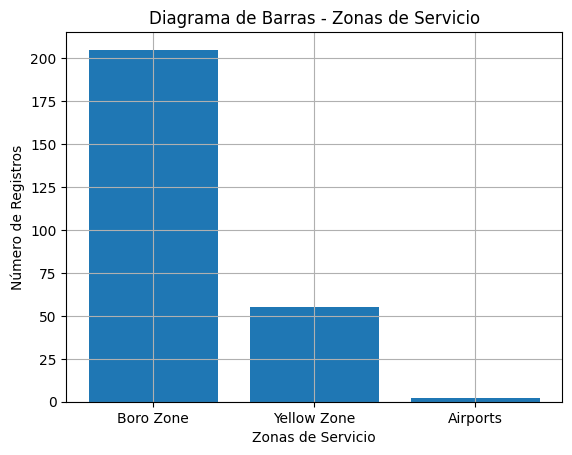

In [268]:
# Contar los valores únicos en la columna 'Service zone'
zone_counts = provisto['service_zone'].value_counts()

# Crear el diagrama de barras
plt.bar(zone_counts.index, zone_counts.values)

# Personalizar el gráfico
plt.xlabel('Zonas de Servicio')
plt.ylabel('Número de Registros')
plt.title('Diagrama de Barras - Zonas de Servicio')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [269]:
provisto.to_parquet(r'0-Local\0-DataSets\2-DatosProporcionadosConETL\Zonas.parquet')

## Ultimos arreglos
En esta seccion modificaremos los datasets para que queden en un formato legible para Power Bi

In [ ]:
estaciones.head(2)

,Fuel Type Code,Station Name,City,State,Status Code,Latitude,Longitude,ID,Country
7,Fuel,Clean Energy - Greenpoint - National Grid,Brooklyn,NY,E,40.718037,-73.932309,108,US
8,Fuel,Canarsie - National Grid,Brooklyn,NY,E,40.645540,-73.918344,112,US


In [ ]:
estaciones['Latitude'] = estaciones['Latitude'].astype(str).str.replace('.', ',')
estaciones['Longitude'] = estaciones['Longitude'].astype(str).str.replace('.', ',')

In [ ]:
estaciones.head(2)

,Fuel Type Code,Station Name,City,State,Status Code,Latitude,Longitude,ID,Country
7,Fuel,Clean Energy - Greenpoint - National Grid,Brooklyn,NY,E,"40,718037","-73,932309",108,US
8,Fuel,Canarsie - National Grid,Brooklyn,NY,E,"40,64554","-73,918344",112,US


In [ ]:
estaciones.to_parquet(r'0-Local\0-DataSets\2-DatosProporcionadosConETL\Estaciones.parquet')

In [ ]:
contaminacion_acustica.head(2)

,borough,latitude,longitude,year,week,day,hour,1_engine_presence
index,,,,,,,,
1,1,40.72951,-73.99388,2023,43,4,8,1
2,1,40.72951,-73.99388,2023,43,4,8,1


In [ ]:
contaminacion_acustica['latitude'] = contaminacion_acustica['latitude'].astype(str).str.replace('.', ',')
contaminacion_acustica['longitude'] = contaminacion_acustica['longitude'].astype(str).str.replace('.', ',')
contaminacion_acustica

,borough,latitude,longitude,year,week,day,hour,1_engine_presence
index,,,,,,,,
1,1,"40,72951","-73,99388",2023,43,4,8,1
2,1,"40,72951","-73,99388",2023,43,4,8,1
4,1,"40,72951","-73,99388",2023,43,4,8,1
5,1,"40,72951","-73,99388",2023,43,4,8,1
6,1,"40,72951","-73,99388",2023,43,4,8,1
...,...,...,...,...,...,...,...,...
61941,1,"40,73365","-73,98879000000001",2023,7,4,20,1
61958,1,"40,73365","-73,98879000000001",2023,3,4,16,1
61989,1,"40,73365","-73,98879000000001",2023,6,6,8,1


In [ ]:
contaminacion_acustica.to_parquet(r'0-Local\0-DataSets\2-DatosProporcionadosConETL\Contanimacion_Acustica.parquet')

In [ ]:
vehiculos_scrapping.head(2)

,Modelo,Tipo,Precio (USD),Descuento E ($10MIL),Depreciación anual (%),Depreciacion 1er año,Consumo mpg o kWh/100 millas,Autonomía millas,Precio (USD/galón o kWh),CO2 (g/milla),Millas/Año,Gasto combustible anual,Gasto en 6 años / cambio de carro,CO2 (Tn/6 años)
0,Toyota Camry,Combustión,25295.0,25295.0,15,3790.0,39.0,520,3.821,220,45656.25,4473.14,52133.84,60.266250
1,Ford Crown Victoria,Combustión,40000.0,40000.0,18,7200.0,24.0,350,3.821,370,45656.25,7268.86,83613.16,101.356875


In [ ]:
vehiculos_scrapping['Descuento E ($10MIL)'] = vehiculos_scrapping['Descuento E ($10MIL)'].astype(str).str.replace('.', ',')
vehiculos_scrapping['Precio (USD)'] = vehiculos_scrapping['Precio (USD)'].astype(str).str.replace('.', ',')
vehiculos_scrapping['Depreciacion 1er año'] = vehiculos_scrapping['Depreciacion 1er año'].astype(str).str.replace('.', ',')
vehiculos_scrapping['Consumo mpg o kWh/100 millas'] = vehiculos_scrapping['Consumo mpg o kWh/100 millas'].astype(str).str.replace('.', ',')
vehiculos_scrapping['Precio (USD/galón o kWh)'] = vehiculos_scrapping['Precio (USD/galón o kWh)'].astype(str).str.replace('.', ',')
vehiculos_scrapping['CO2 (g/milla)'] = vehiculos_scrapping['CO2 (g/milla)'].astype(str).str.replace('.', ',')
vehiculos_scrapping['Millas/Año'] = vehiculos_scrapping['Millas/Año'].astype(str).str.replace('.', ',')
vehiculos_scrapping['Gasto combustible anual'] = vehiculos_scrapping['Gasto combustible anual'].astype(str).str.replace('.', ',')
vehiculos_scrapping['Gasto en 6 años / cambio de carro'] = vehiculos_scrapping['Gasto en 6 años / cambio de carro'].astype(str).str.replace('.', ',')
vehiculos_scrapping['CO2 (Tn/6 años)'] = vehiculos_scrapping['CO2 (Tn/6 años)'].astype(str).str.replace('.', ',')
vehiculos_scrapping

,Modelo,Tipo,Precio (USD),Descuento E ($10MIL),Depreciación anual (%),Depreciacion 1er año,Consumo mpg o kWh/100 millas,Autonomía millas,Precio (USD/galón o kWh),CO2 (g/milla),Millas/Año,Gasto combustible anual,Gasto en 6 años / cambio de carro,CO2 (Tn/6 años)
0,Toyota Camry,Combustión,"25295,0","25295,0",15,"3790,0","39,0",520,"3,821",220,"45656,25","4473,14","52133,840000000004","60,26625"
1,Ford Crown Victoria,Combustión,"40000,0","40000,0",18,"7200,0","24,0",350,"3,821",370,"45656,25","7268,86","83613,16","101,356875"
2,Nissan NV200 Taxi,Combustión,"31000,0","31000,0",17,"5270,0","24,0",400,"3,821",269,"45656,25","7268,86","74613,16","73,6891875"
3,Chevrolet Express,Combustión,"32000,0","32000,0",16,"5120,0","18,0",450,"3,821",434,"45656,25","9691,81","90150,86","118,888875"
4,Ram ProMaster City,Combustión,"26495,0","26495,0",15,"3970,0","24,0",360,"3,821",352,"45656,25","7268,86","70108,16","96,426"
5,Tesla Model 3,Eléctrico,"46990,0","36990,0",10,"3699,0","27,0",358,"0,151",0,"45656,25","1861,41","48158,46","0,0"
6,Chevrolet Bolt EV,Eléctrico,"26595,0","16595,0",11,"1830,0","29,0",259,"0,151",0,"45656,25","1999,29","28590,739999999998","0,0"
7,Nissan LEAF,Eléctrico,"27400,0","17400,0",12,"2100,0","32,0",226,"0,151",0,"45656,25","2206,11","30636,66","0,0"
8,Hyundai Kona Electric,Eléctrico,"34000,0","24000,0",13,"3120,0","25,8",258,"0,151",0,"45656,25","1778,68","34672,08","0,0"
9,Kia EV6,Eléctrico,"40990,0","30990,0",14,"4340,0","29,5",239,"0,151",0,"45656,25","2033,76","43192,56","0,0"


In [ ]:
vehiculos_scrapping.to_parquet(r'0-Local\0-DataSets\2-DatosProporcionadosConETL\Vehiculos.parquet')

In [ ]:
temperatura_emisiones.head(2)

,año,temperature_C,emisiones
0,1980,11.063308,4877.338
1,1981,10.769635,4808.586


In [ ]:
temperatura_emisiones['temperature_C'] = temperatura_emisiones['temperature_C'].astype(str).str.replace('.', ',')
temperatura_emisiones['emisiones'] = temperatura_emisiones['emisiones'].astype(str).str.replace('.', ',')
temperatura_emisiones

,año,temperature_C,emisiones
0,1980,"11,063308287796053","4877,338"
1,1981,"10,769634703196383","4808,586"
2,1982,"10,831632420091344","4563,081"
3,1983,"11,59538812785388","4542,189"
4,1984,"11,15791211293264","4752,535"
5,1985,"11,450011415525111","4778,509"
6,1986,"11,315353881278536","4737,864"
7,1987,"10,98382420091321","4895,436"
8,1988,"10,94214480874315","5118,630"
9,1989,"10,822454337899515","5176,127"


In [ ]:
temperatura_emisiones.to_parquet(r'0-Local\0-DataSets\2-DatosProporcionadosConETL\Temperatura_Emisiones.parquet')